## About Data

The dataset consists of weather-related features that influence rainfall occurrence.

#### Features in Data:

1. id - Unique identifier for each record.
2. day	- Day of observation.
3. pressure - Atmospheric pressure (hPa).
4. maxtemp	- Maximum temperature recorded (°C).
5. temparature	- Average temperature during the day (°C).
6. mintemp	- Minimum temperature recorded (°C).
7. dewpoint - Dew point temperature (°C), indicating moisture saturation.
8. humidity - Percentage of humidity in the air.
9. cloud - Cloud cover percentage.
10. sunshine - Hours of sunshine during the day.
11. winddirection - Wind direction in degrees (0° to 360°).
12. windspeed - Wind speed (km/h).
13. rainfall (Target) - Binary label: 1 (rain), 0 (no rain).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
Data=pd.read_csv("Data.csv")

In [4]:
Data.head(5)

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [5]:
Data.tail(5)

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
2185  2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   
2186  2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   
2187  2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   
2188  2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   
2189  2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
2185   88.0       0.1           40.0       22.1         1  
2186   88.0       0.0           50.0       35.3         1  
2187   79.0       5.0           40.0       32.9         1  
2188   93.0       0.1           40.0       18.0         1  
2189   88.0       1.0           70.0       48.0         1

In [6]:
Data.shape

(2190, 13)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [8]:
Data.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [9]:
Data.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object

In [10]:
Data.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

In [11]:
# Checking null values

Data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [12]:
Data.duplicated().sum()

0

In [13]:
Data.nunique()

id               2190
day               365
pressure          236
maxtemp           219
temparature       198
mintemp           199
dewpoint          218
humidity           49
cloud              78
sunshine          120
winddirection      35
windspeed         223
rainfall            2
dtype: int64

<Figure size 2000x1200 with 0 Axes>

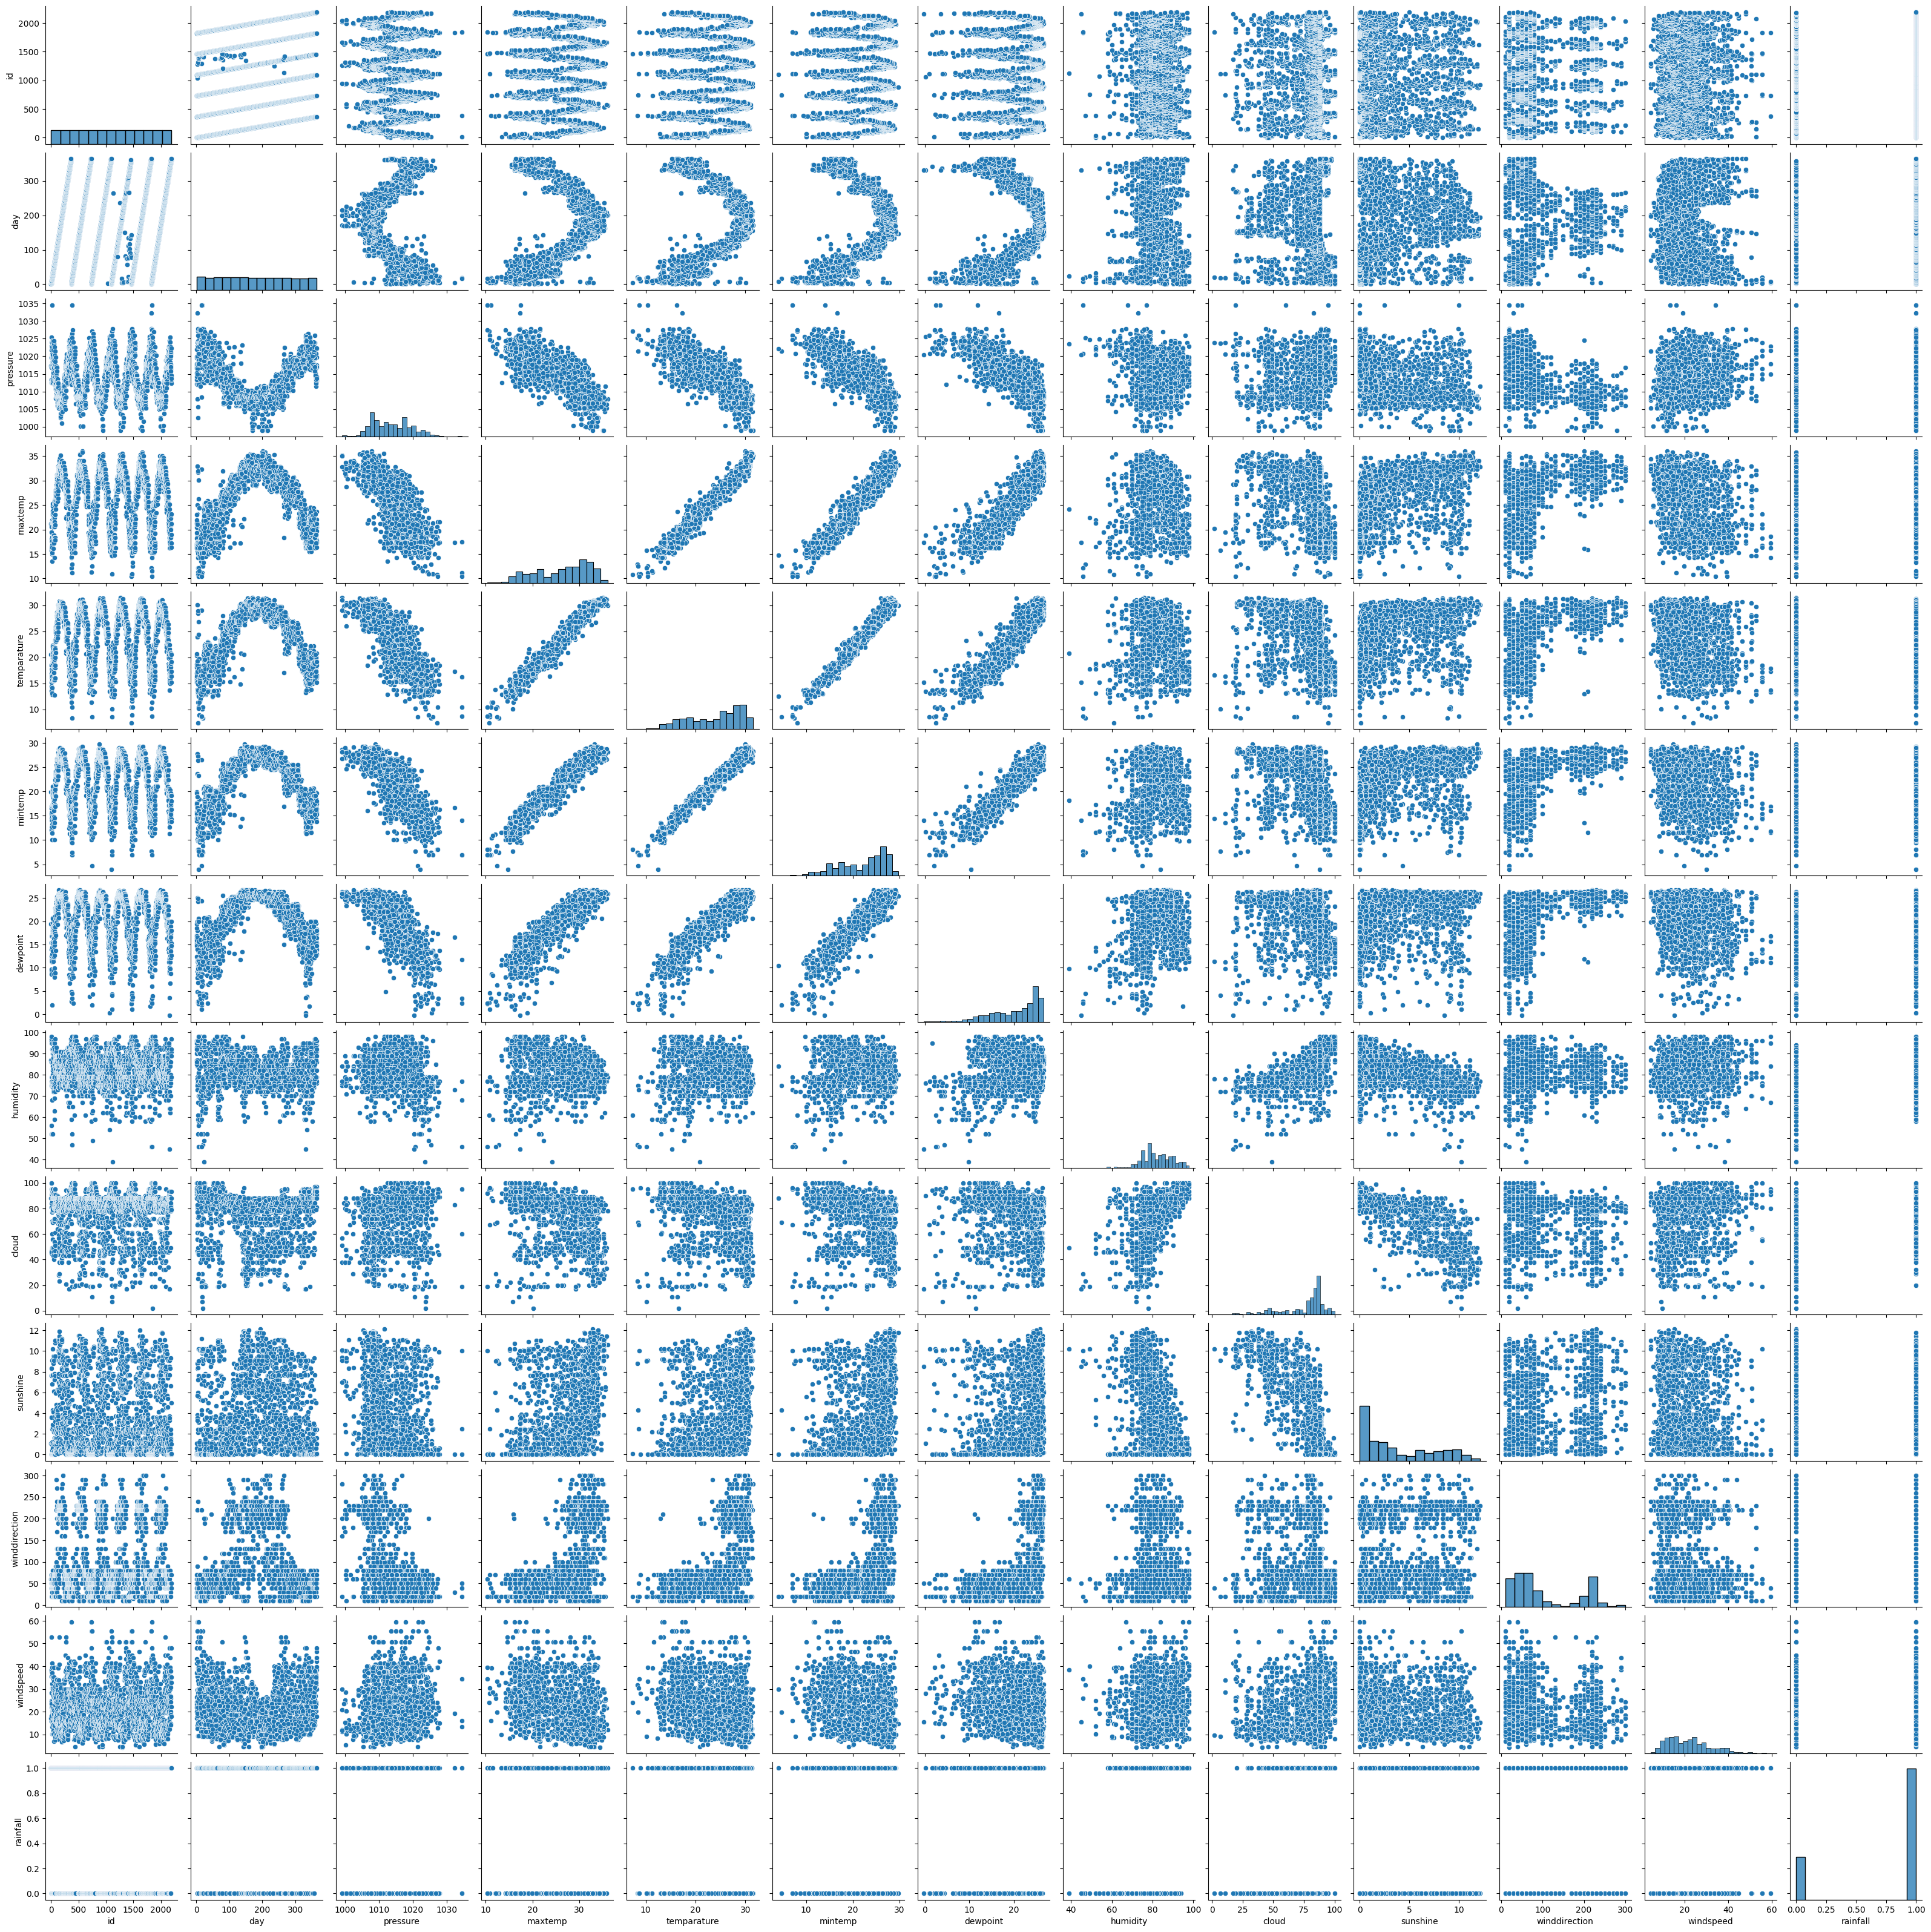

In [14]:
plt.figure(figsize=(20,12))

sns.pairplot(Data)

<Axes: ylabel='Density'>

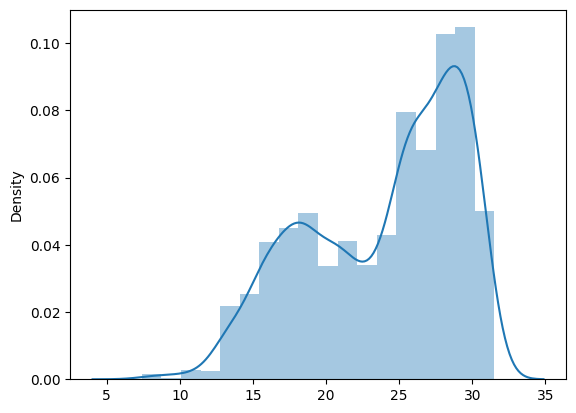

In [15]:
sns.distplot(x=Data['temparature'])

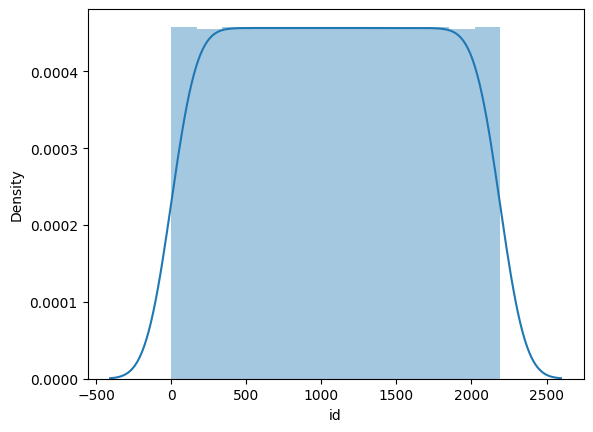

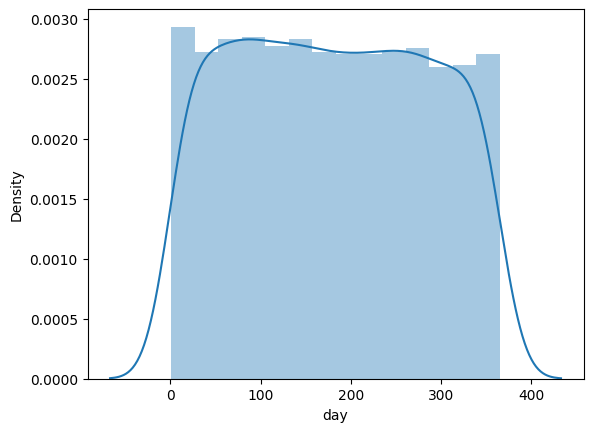

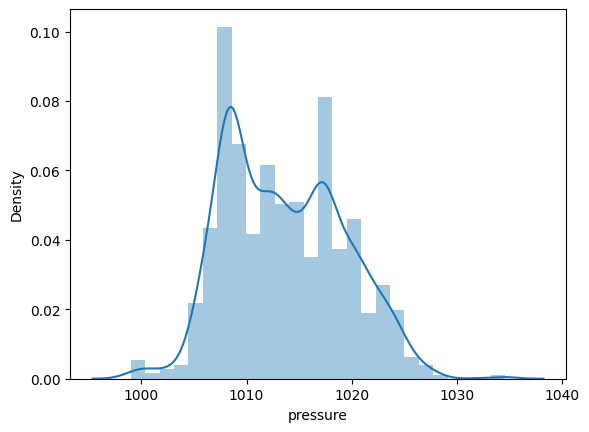

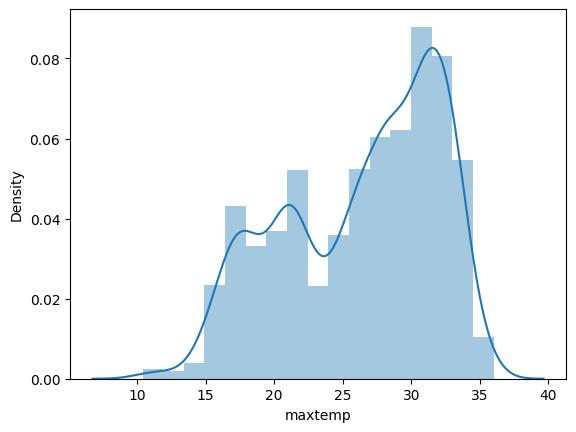

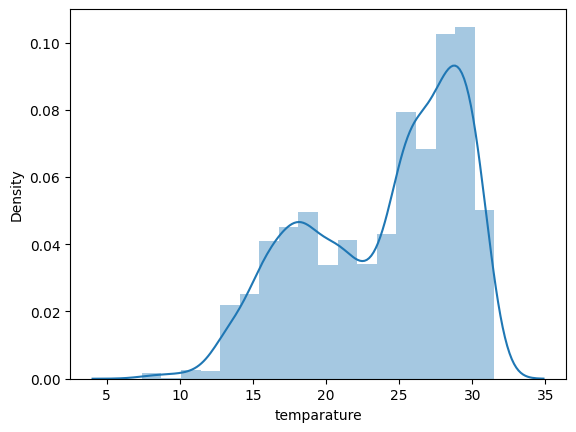

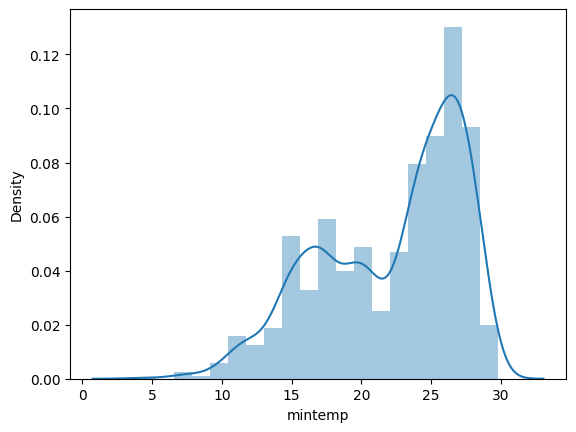

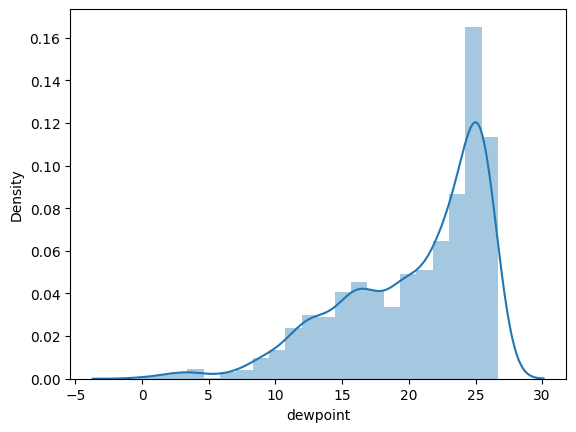

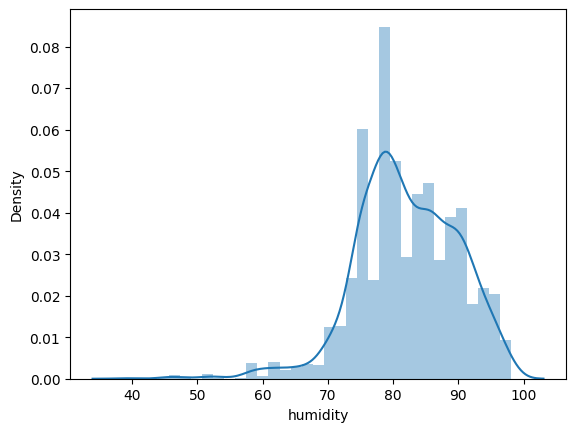

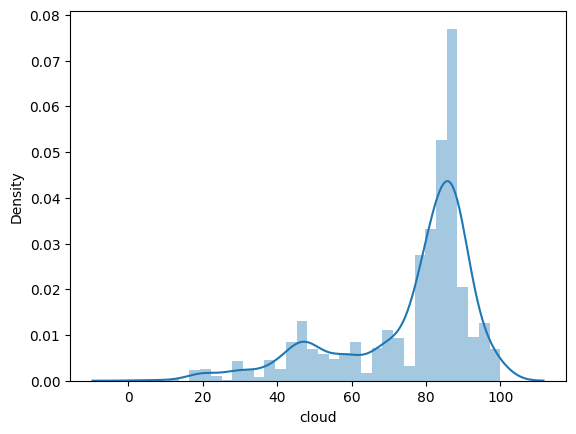

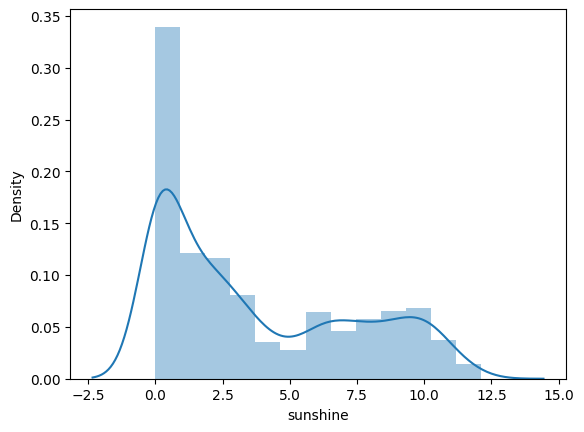

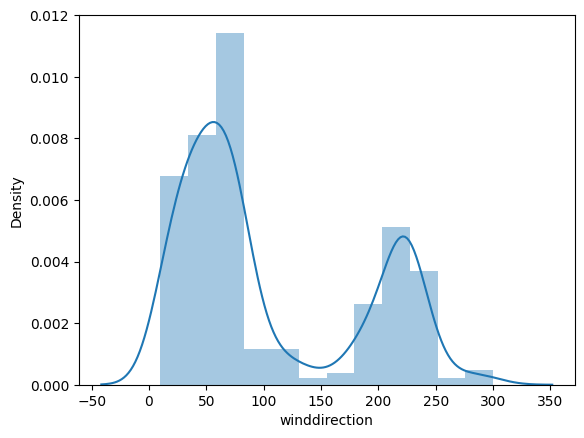

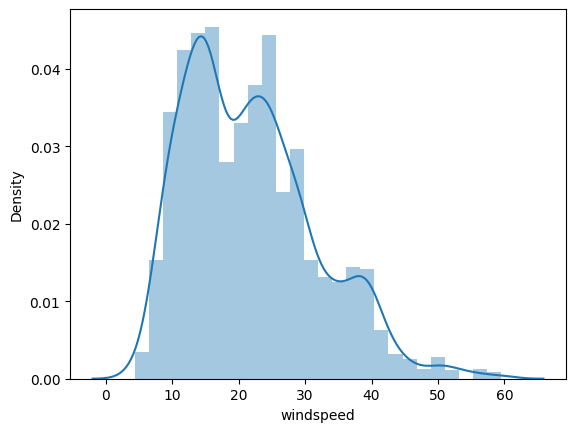

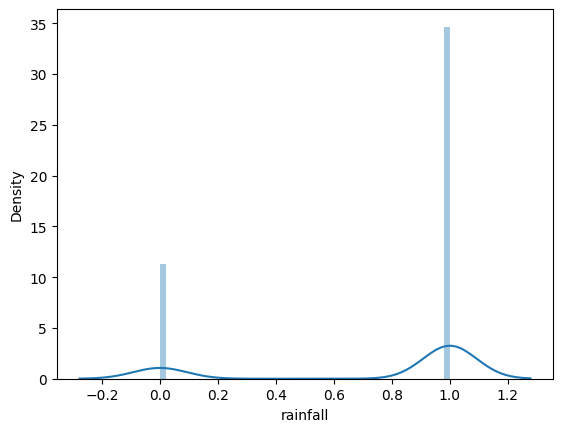

In [16]:
for i in Data.columns:
    sns.distplot(x=Data[i])
    plt.xlabel(i)
    plt.show()

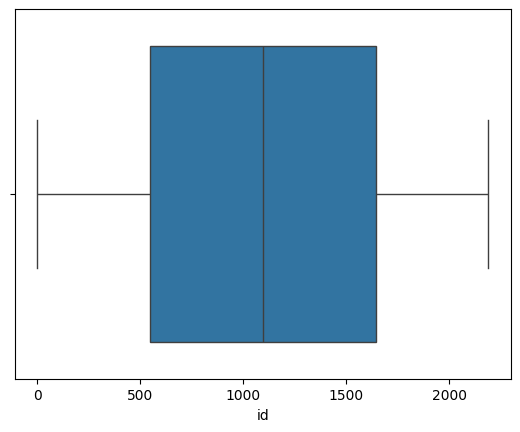

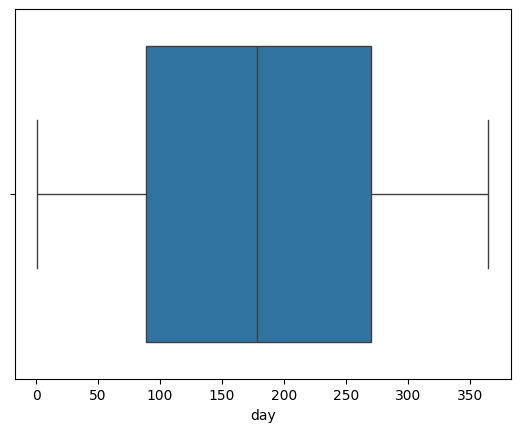

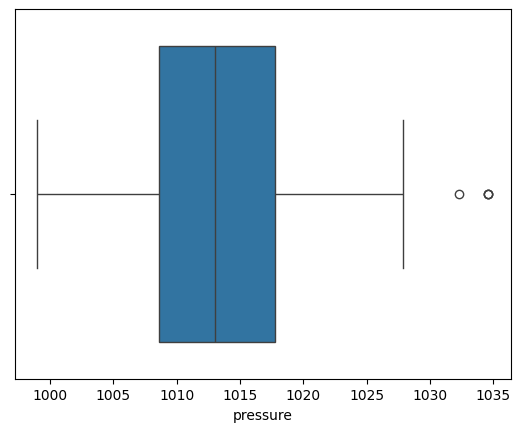

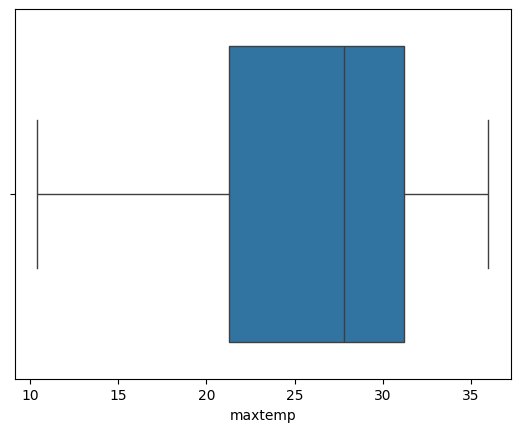

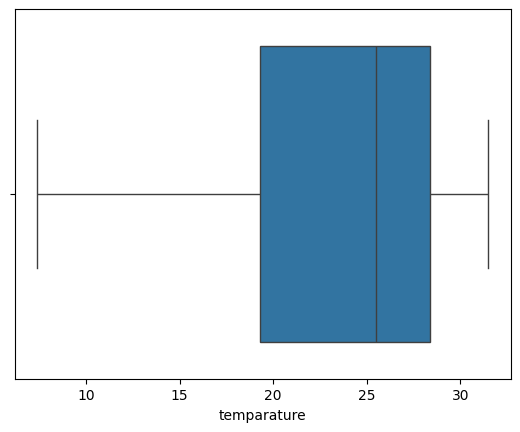

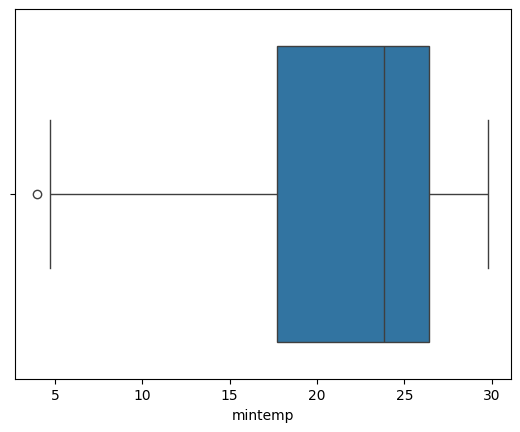

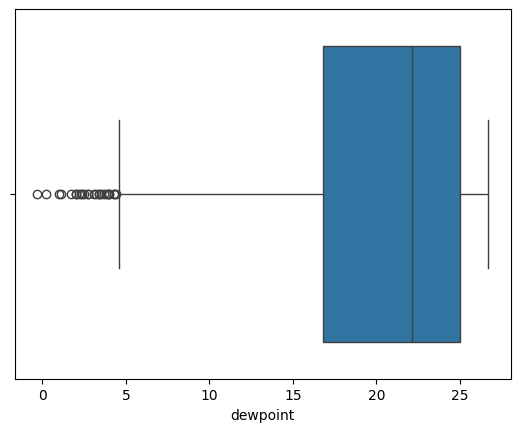

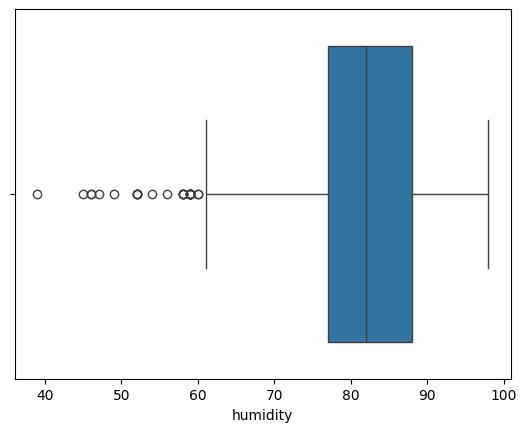

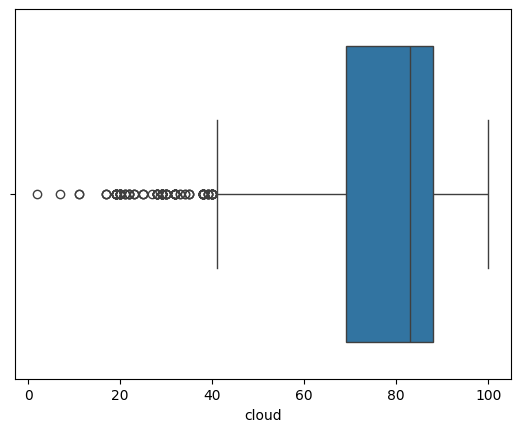

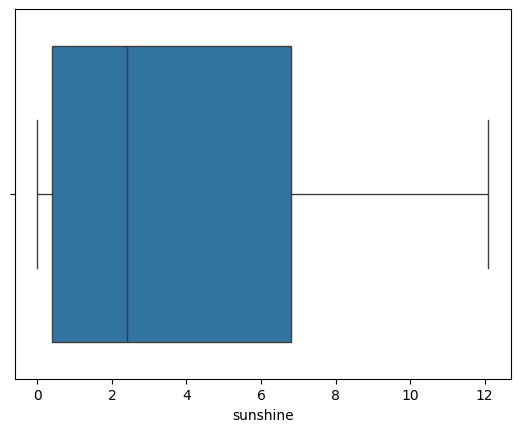

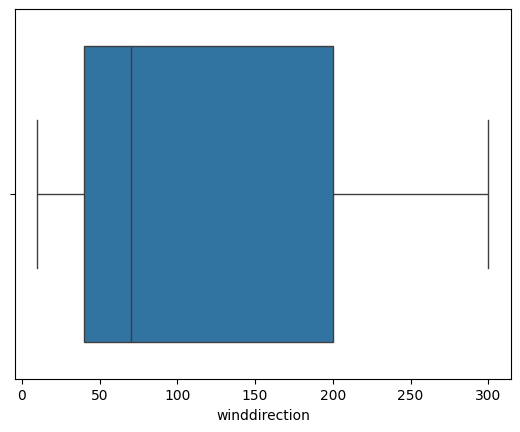

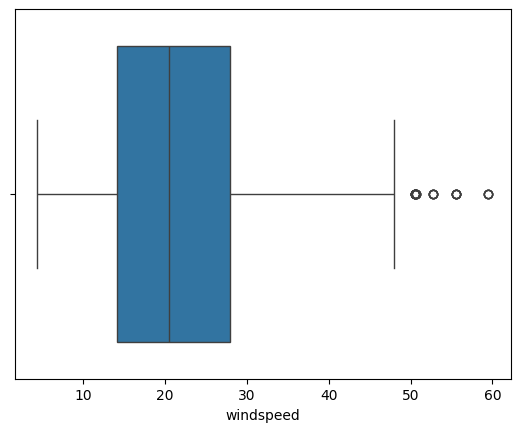

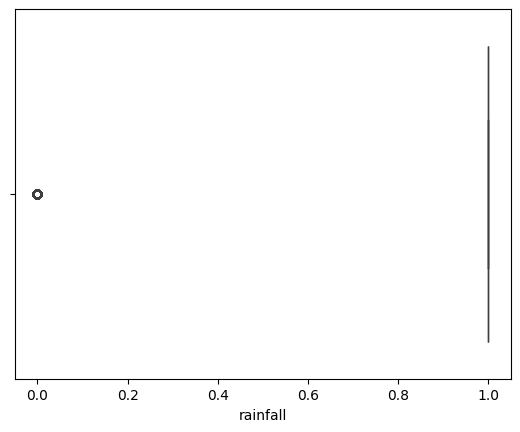

In [17]:
for i in Data.columns:
    sns.boxplot(x=Data[i])
    plt.xlabel(i)
    plt.show()

<Axes: xlabel='rainfall', ylabel='count'>

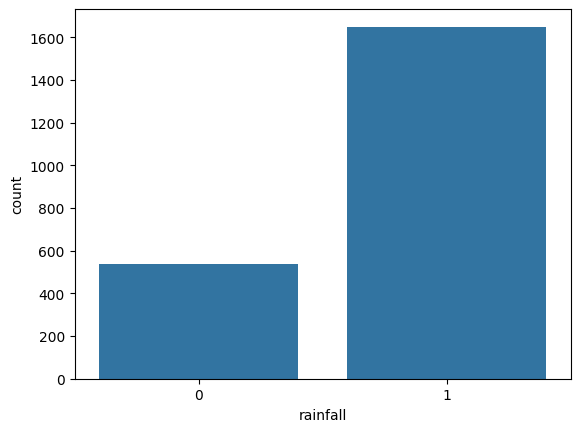

In [18]:
sns.countplot(x=Data['rainfall'])

In [19]:
Data['rainfall'].value_counts()

1    1650
0     540
Name: rainfall, dtype: int64

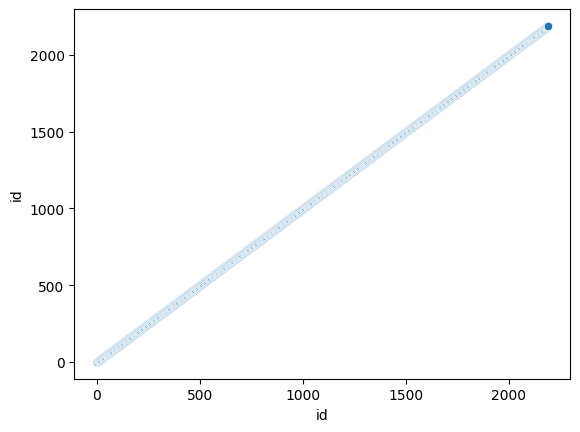

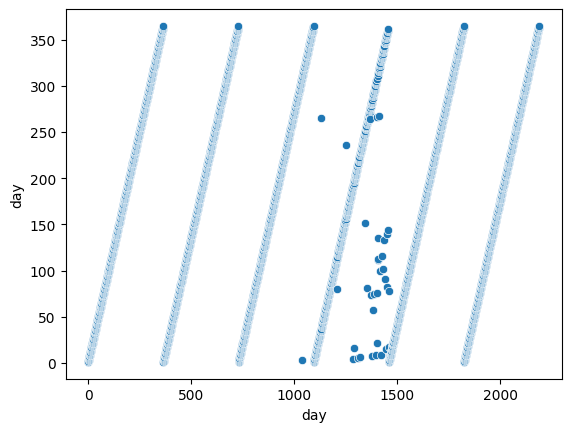

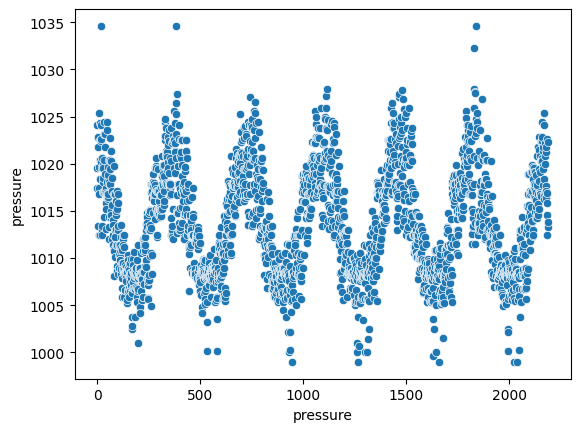

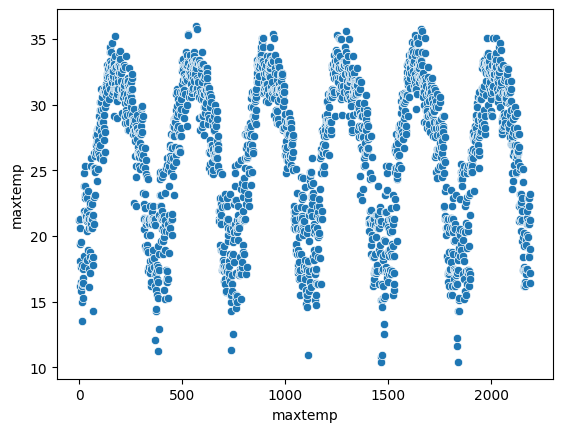

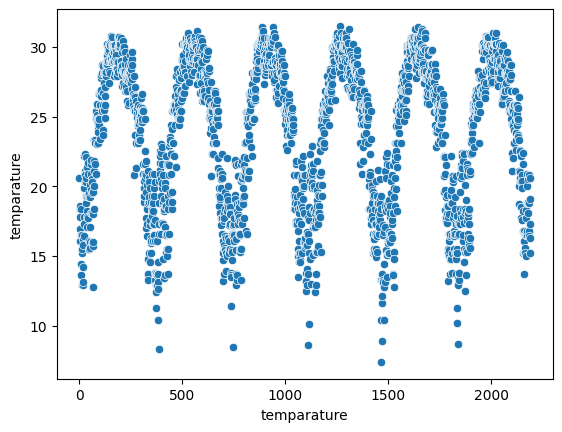

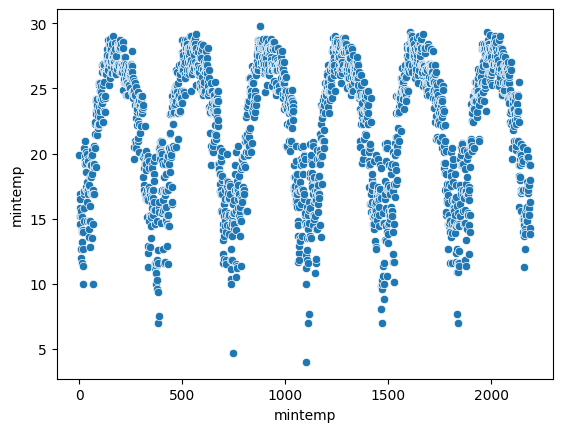

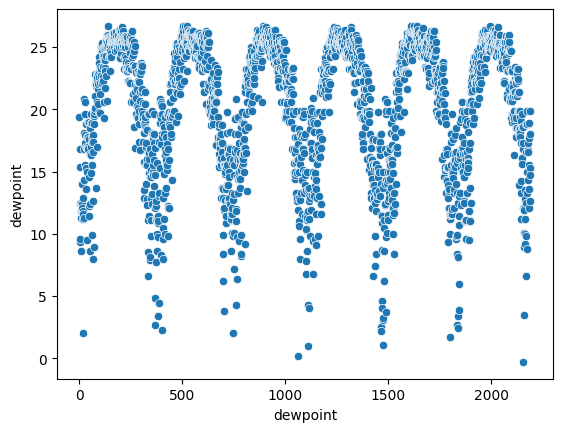

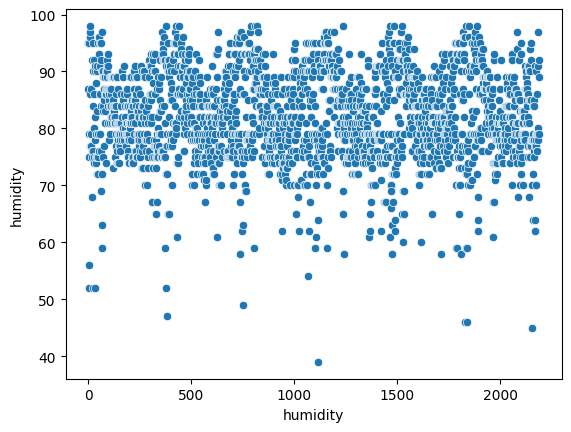

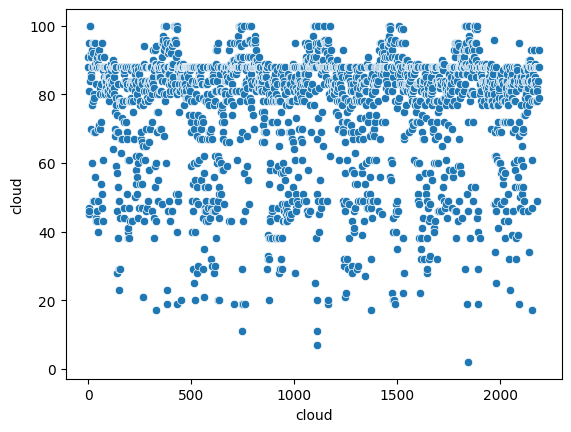

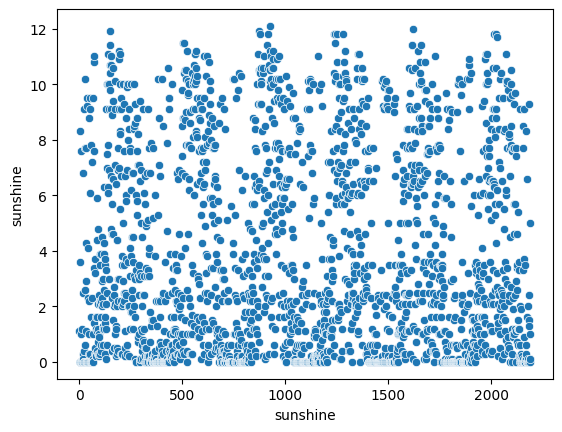

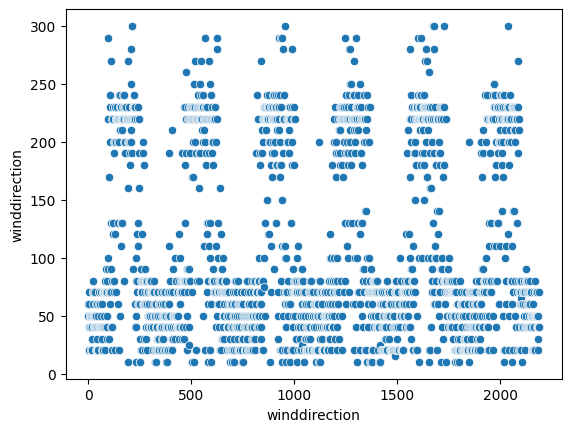

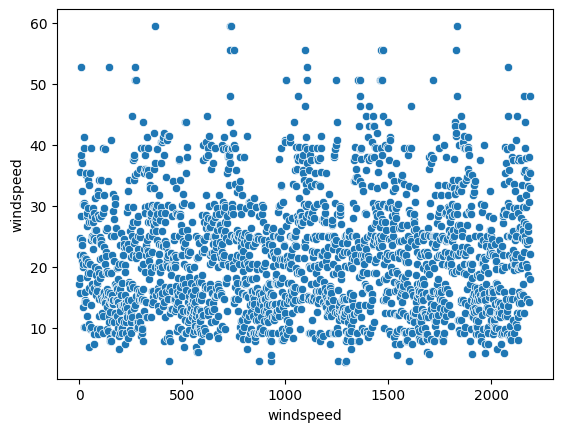

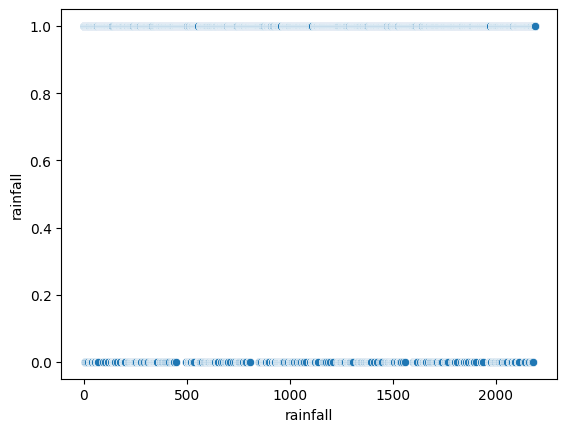

In [20]:
for i in Data.columns:
    sns.scatterplot(Data[i])
    plt.xlabel(i)
    plt.show()

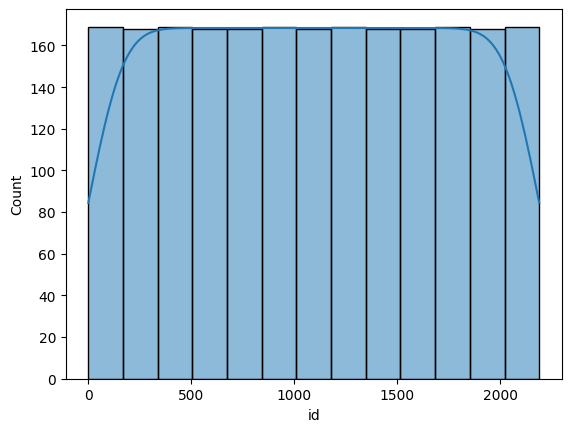

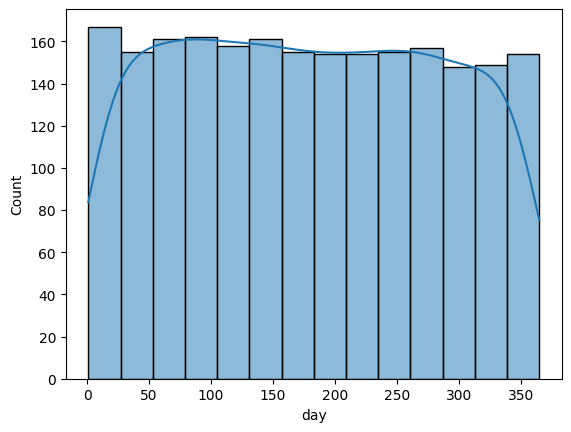

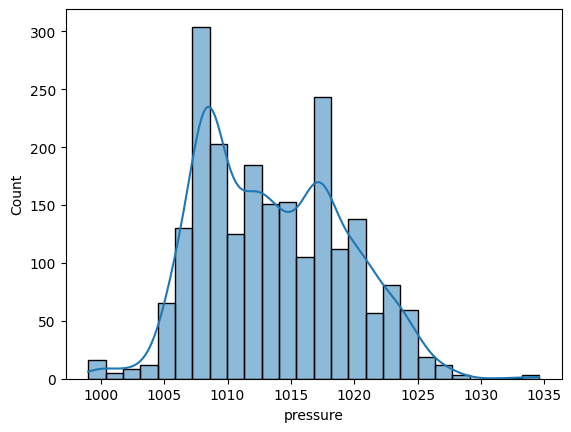

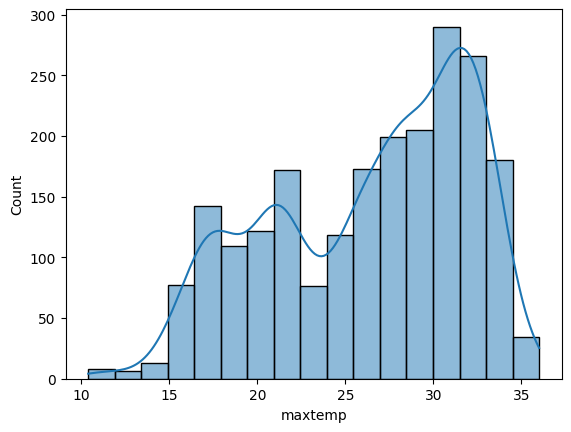

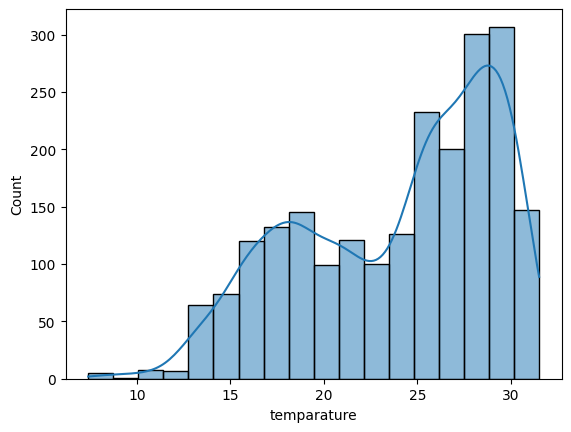

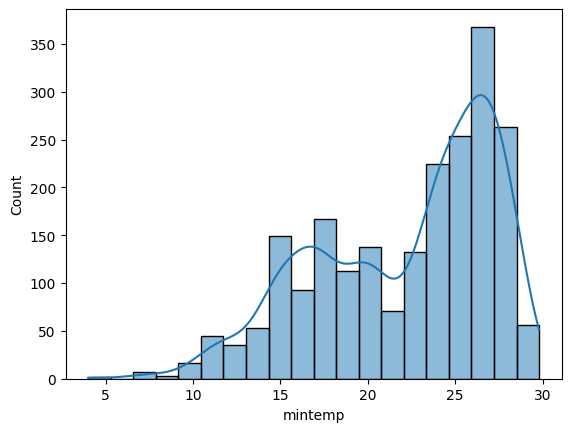

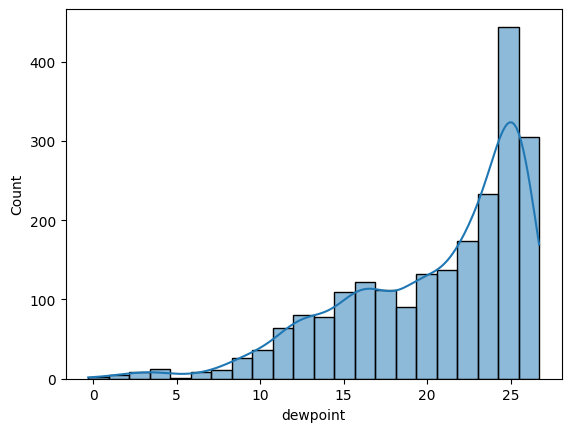

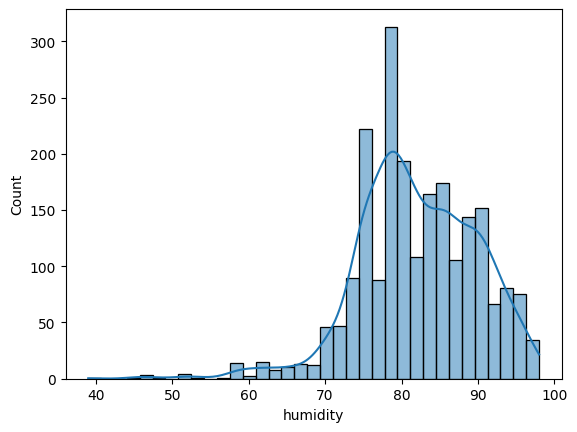

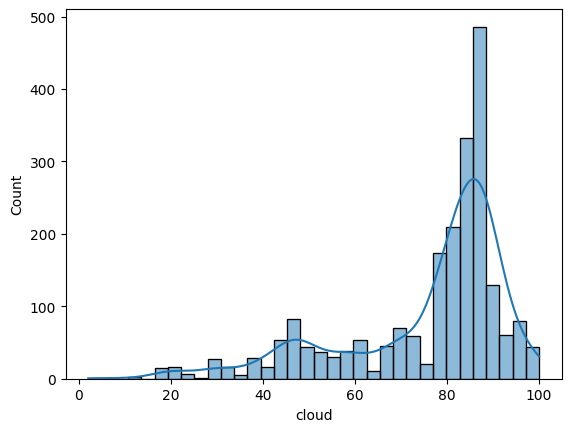

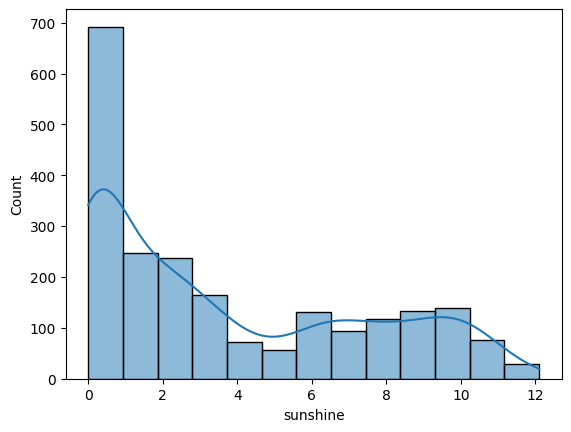

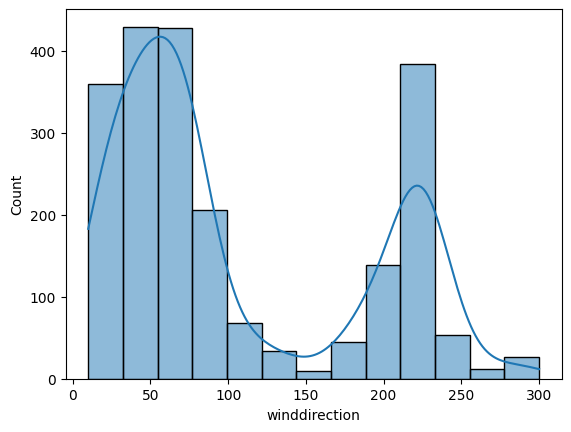

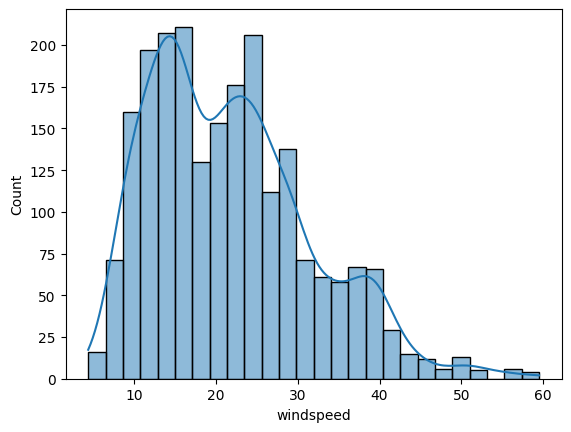

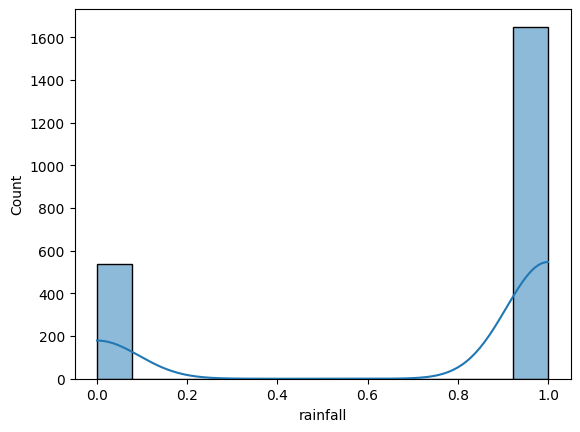

In [21]:
for i in Data.columns:
    sns.histplot(Data[i], kde=True)
    plt.xlabel(i)
    plt.show()

In [22]:
Data.corr()

id       day  pressure   maxtemp  temparature   mintemp  \
id             1.000000  0.153065 -0.008235  0.012590     0.014307  0.018708   
day            0.153065  1.000000  0.005337  0.146294     0.153590  0.161475   
pressure      -0.008235  0.005337  1.000000 -0.800499    -0.816531 -0.814453   
maxtemp        0.012590  0.146294 -0.800499  1.000000     0.982932  0.965529   
temparature    0.014307  0.153590 -0.816531  0.982932     1.000000  0.987150   
mintemp        0.018708  0.161475 -0.814453  0.965529     0.987150  1.000000   
dewpoint       0.006797  0.137929 -0.817008  0.906703     0.933617  0.941342   
humidity      -0.029042 -0.074048 -0.119949 -0.072615    -0.025016  0.009891   
cloud          0.002226 -0.048175  0.098600 -0.289047    -0.249355 -0.219399   
sunshine      -0.003022  0.060936 -0.257163  0.452387     0.414019  0.379497   
winddirection -0.004223  0.024800 -0.643293  0.662235     0.668963  0.663828   
windspeed      0.020167 -0.000199  0.266012 -0.354168    -0.342262 -0.328871   
rainfall       0.033674 -0.000462 -0.049886 -0.079304    -0.049660 -0.026841   

               dewpoint  humidity     cloud  sunshine  winddirection  \
id             0.006797 -0.029042  0.002226 -0.003022      -0.004223   
day            0.137929 -0.074048 -0.048175  0.060936       0.024800   
pressure      -0.817008 -0.119949  0.098600 -0.257163      -0.643293   
maxtemp        0.906703 -0.072615 -0.289047  0.452387       0.662235   
temparature    0.933617 -0.025016 -0.249355  0.414019       0.668963   
mintemp        0.941342  0.009891 -0.219399  0.379497       0.663828   
dewpoint       1.000000  0.153390 -0.088446  0.249676       0.643073   
humidity       0.153390  1.000000  0.584854 -0.541592      -0.012430   
cloud         -0.088446  0.584854  1.000000 -0.805128      -0.127087   
sunshine       0.249676 -0.541592 -0.805128  1.000000       0.272235   
winddirection  0.643073 -0.012430 -0.127087  0.272235       1.000000   
windspeed     -0.312179  0.062285  0.184698 -0.241752      -0.192417   
rainfall       0.081965  0.454213  0.641191 -0.555287      -0.006939   

               windspeed  rainfall  
id              0.020167  0.033674  
day            -0.000199 -0.000462  
pressure        0.266012 -0.049886  
maxtemp        -0.354168 -0.079304  
temparature    -0.342262 -0.049660  
mintemp        -0.328871 -0.026841  
dewpoint       -0.312179  0.081965  
humidity        0.062285  0.454213  
cloud           0.184698  0.641191  
sunshine       -0.241752 -0.555287  
winddirection  -0.192417 -0.006939  
windspeed       1.000000  0.111625  
rainfall        0.111625  1.000000

<Axes: >

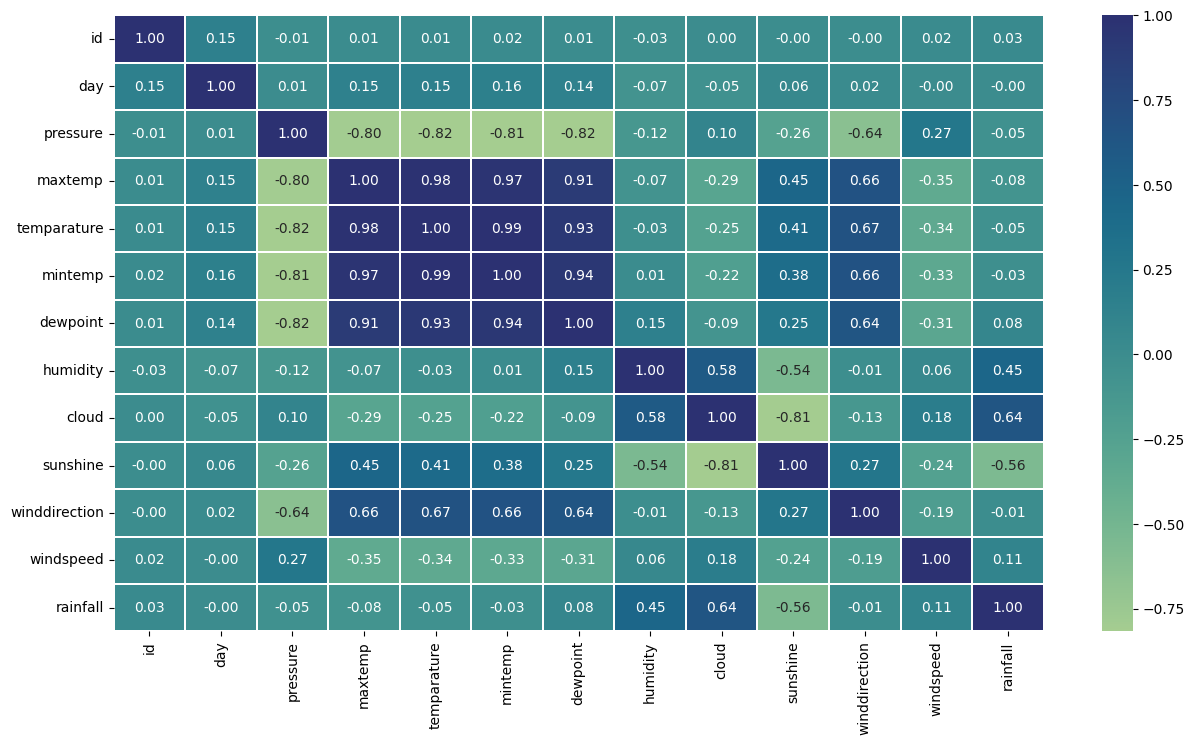

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(Data.corr(), cmap='crest', fmt='.2f', annot=True, linewidth=0.2)

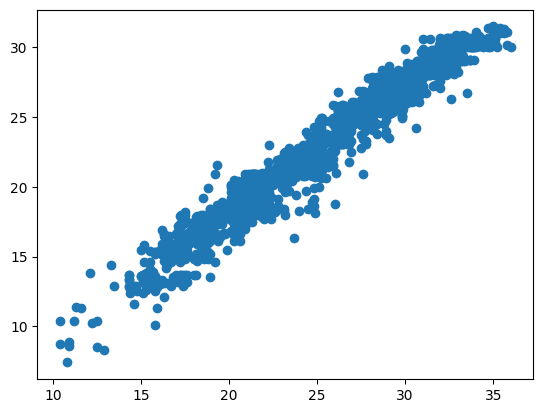

In [24]:
plt.scatter(Data['maxtemp'], Data['temparature'])

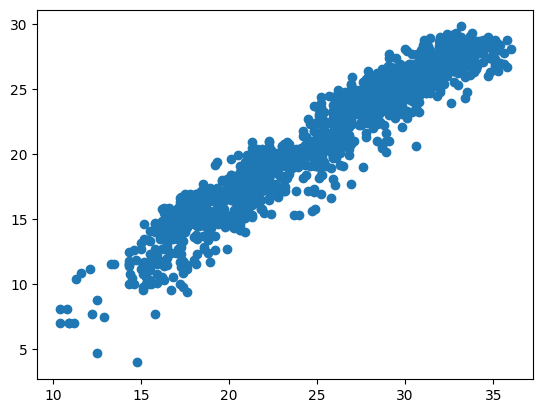

In [25]:
plt.scatter(Data['maxtemp'], Data['mintemp'])

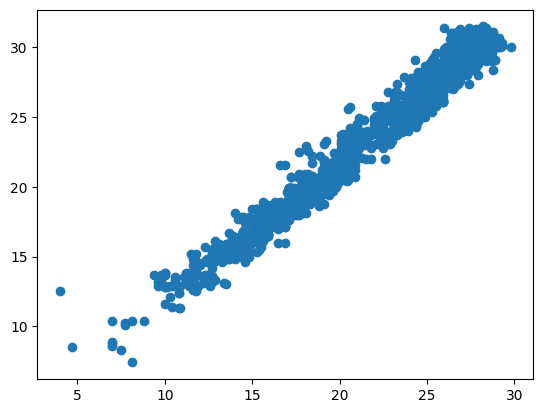

In [26]:
plt.scatter(Data['mintemp'], Data['temparature'])

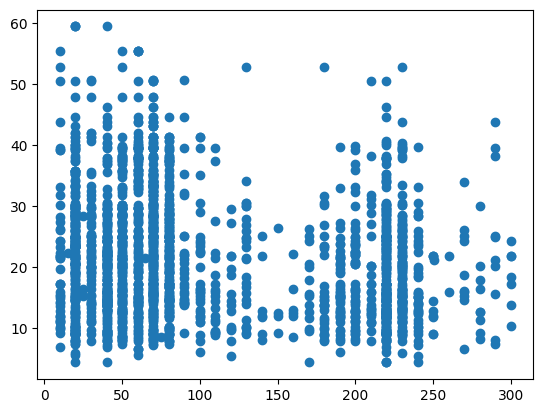

In [27]:
plt.scatter(Data['winddirection'], Data['windspeed'])

<Axes: xlabel='temparature', ylabel='Count'>

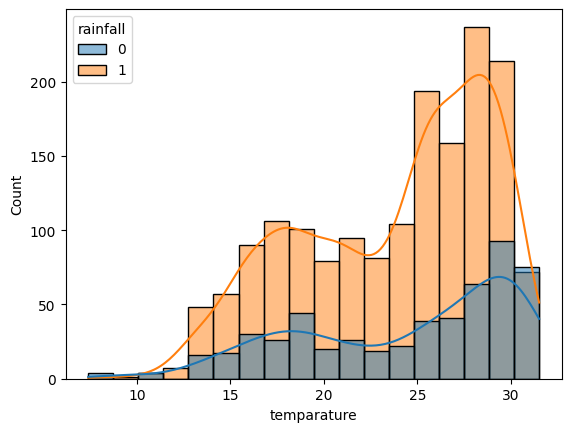

In [28]:
sns.histplot(x=Data['temparature'], kde=True, hue=Data['rainfall'])

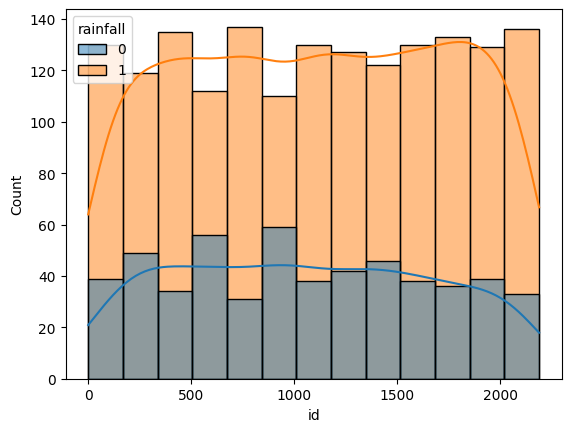

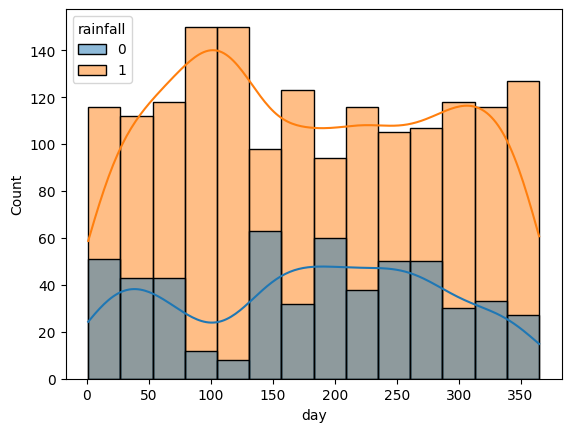

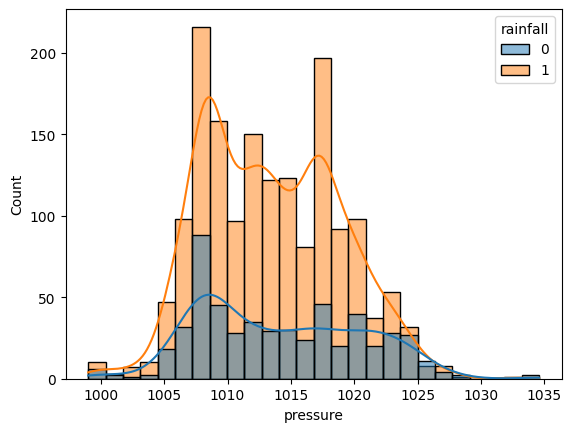

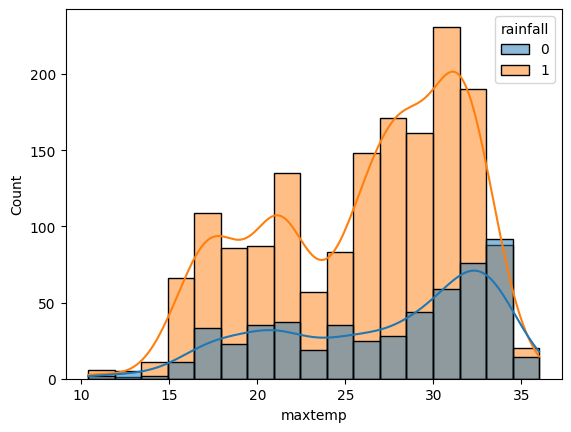

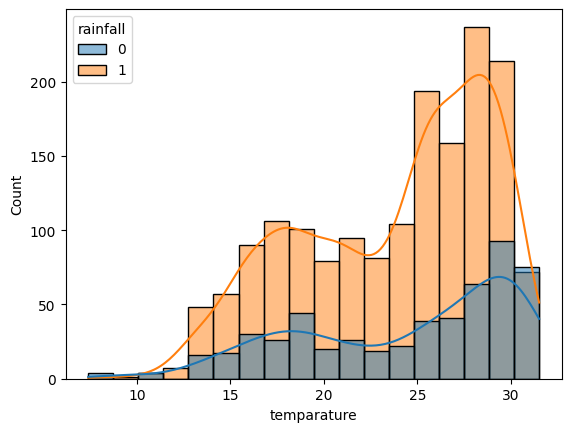

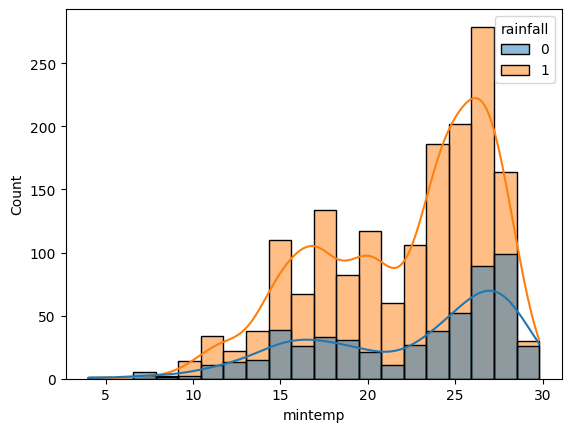

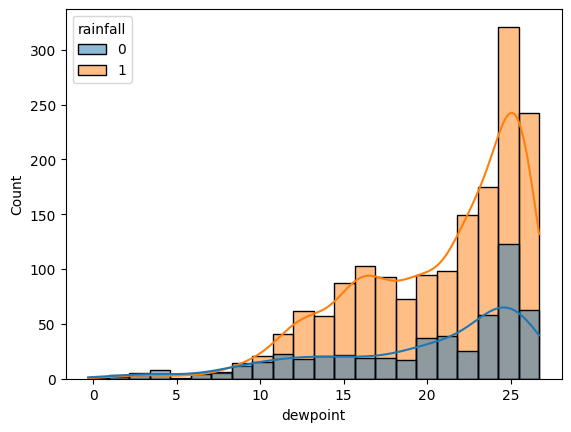

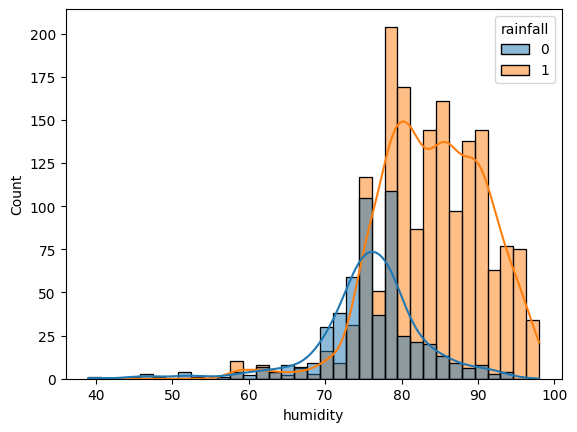

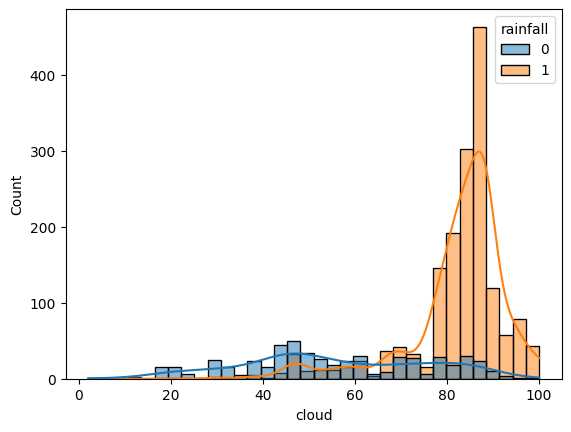

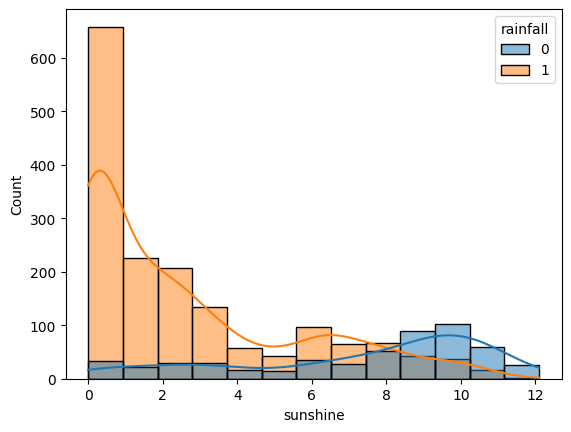

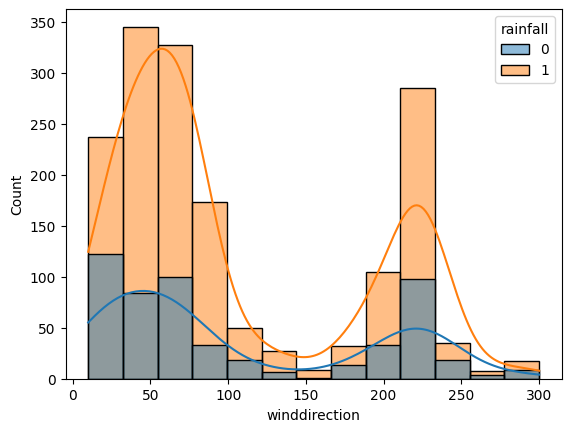

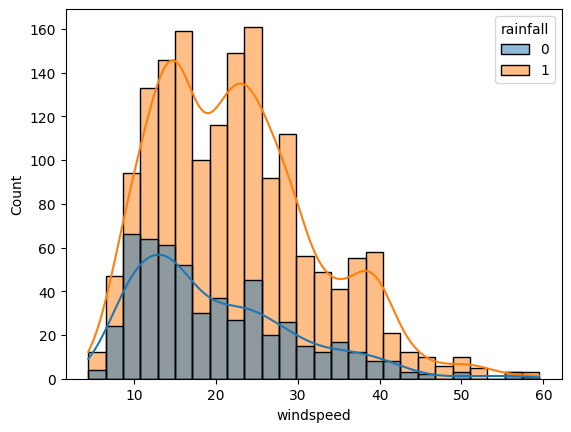

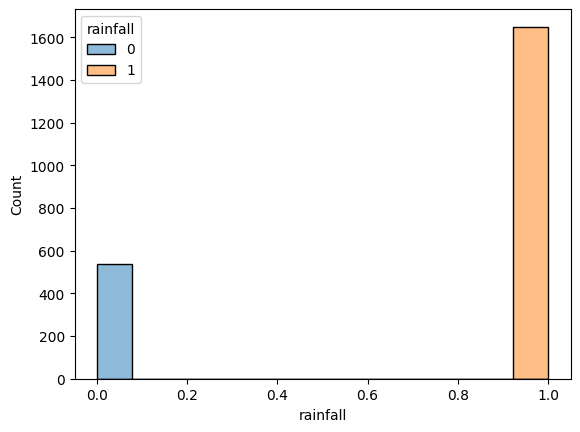

In [29]:
for i in Data.columns:
    sns.histplot(x=Data[i], kde=True, hue=Data['rainfall'])
    plt.xlabel(i)
    plt.show()

In [30]:
X=Data.drop('rainfall', axis=1)
y=Data['rainfall']

In [31]:
X

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0        0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1        1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2        2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3        3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4        4    5    1021.8     21.3         18.4     15.2       9.6      52.0   
...    ...  ...       ...      ...          ...      ...       ...       ...   
2185  2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   
2186  2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   
2187  2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   
2188  2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   
2189  2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   

      cloud  sunshine  winddirection  windspeed  
0      88.0       1.1           60.0       17.2  
1      91.0       0.0           50.0       21.9  
2      47.0       8.3           70.0       18.1  
3      95.0       0.0           60.0       35.6  
4      45.0       3.6           40.0       24.8  
...     ...       ...            ...        ...  
2185   88.0       0.1           40.0       22.1  
2186   88.0       0.0           50.0       35.3  
2187   79.0       5.0           40.0       32.9  
2188   93.0       0.1           40.0       18.0  
2189   88.0       1.0           70.0       48.0  

[2190 rows x 12 columns]

In [32]:
y

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=23, test_size=0.25)

In [35]:
X_train.shape, X_test.shape

((1642, 12), (548, 12))

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [38]:
X_train=scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [40]:
X_train

array([[ 1.00617837,  0.88208331,  0.36075763, ..., -0.961332  ,
        -0.30981089,  0.30742535],
       [-1.45875895,  0.00473914, -0.91596541, ..., -0.90577326,
         1.07220018, -0.22276625],
       [-1.45399425,  0.03334819, -1.2174139 , ...,  0.17762217,
         1.44911229, -0.57289278],
       ...,
       [-0.05476115,  1.473337  ,  1.63748066, ...,  1.2610176 ,
        -1.06363511, -0.30279517],
       [-0.56617211, -1.59736763,  0.5735448 , ..., -1.04467011,
        -0.43544826,  1.74794592],
       [-0.79964233,  0.48155662, -0.9691622 , ...,  0.1498428 ,
         1.44911229,  0.64754826]])

In [41]:
X_test

array([[-1.64299395, -1.10147744,  1.03458367, ..., -0.76687641,
        -0.686723  ,  0.75758802],
       [-0.52487806, -1.34942253,  0.62674159, ..., -0.76687641,
        -0.686723  ,  0.28741812],
       [ 1.00300191,  0.86301062, -0.36626521, ..., -0.60020019,
        -0.30981089,  1.92801099],
       ...,
       [ 1.64464796,  1.23492826,  0.71540291, ..., -0.98911137,
        -0.56108563, -0.80297593],
       [-1.22370049,  1.4161189 ,  1.58428386, ..., -1.04467011,
        -1.18927247,  0.23740004],
       [-1.06964191, -1.13962284,  0.18343498, ...,  0.26096028,
        -0.30981089, -0.18275179]])

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

In [44]:
def model_evaluate(true, predicted):
    accuracy=accuracy_score(true, predicted)
    f1=f1_score(true, predicted)
    precision=precision_score(true, predicted)
    recall=recall_score(true, predicted)
    roc_auc=roc_auc_score(true, predicted)
    return accuracy, f1, precision, recall, roc_auc

In [62]:
models={
    'Logistic Regression' : LogisticRegression(),
    'Bernoulli NB' : BernoulliNB(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'SVM' : SVC(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'K Neigbors Classifier': KNeighborsClassifier()
}

model_list=[]
f1_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_acc, model_train_f1, model_train_prec, model_train_recall, model_train_roc_auc=model_evaluate(y_train, y_train_pred)
    model_test_acc, model_test_f1, model_test_prec, model_test_recall, model_test_roc_auc=model_evaluate(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Perfromance for Training Data : ")
    print(" - Accuracy Score : {:.4f}".format(model_train_acc))
    print(" - F1 Score : {:.4f}".format(model_train_f1))
    print(" - Precision Score : {:.4f}".format(model_train_prec))
    print(" - Recall Score : {:.4f}".format(model_train_recall))
    print(" - ROC AUC Score : {:.4f}".format(model_train_f1))

    print("-------------------------------------------------")

    print("Model Perfromance for Testing Data : ")
    print(" - Accuracy Score : {:.4f}".format(model_test_acc))
    print(" - F1 Score : {:.4f}".format(model_test_f1))
    print(" - Precision Score : {:.4f}".format(model_test_prec))
    print(" - Recall Score : {:.4f}".format(model_test_recall))
    print(" - ROC AUC Score : {:.4f}".format(model_test_f1))

    f1_list.append(model_test_f1)

    
    print('\n')
    print("#"*45)
    print('\n')

Logistic Regression
Model Perfromance for Training Data : 
 - Accuracy Score : 0.8654
 - F1 Score : 0.9138
 - Precision Score : 0.8913
 - Recall Score : 0.9376
 - ROC AUC Score : 0.9138
-------------------------------------------------
Model Perfromance for Testing Data : 
 - Accuracy Score : 0.8613
 - F1 Score : 0.9100
 - Precision Score : 0.8649
 - Recall Score : 0.9600
 - ROC AUC Score : 0.9100


#############################################


Bernoulli NB
Model Perfromance for Training Data : 
 - Accuracy Score : 0.8331
 - F1 Score : 0.8871
 - Precision Score : 0.9150
 - Recall Score : 0.8608
 - ROC AUC Score : 0.8871
-------------------------------------------------
Model Perfromance for Testing Data : 
 - Accuracy Score : 0.8376
 - F1 Score : 0.8875
 - Precision Score : 0.8977
 - Recall Score : 0.8775
 - ROC AUC Score : 0.8875


#############################################


Decision Tree Classifier
Model Perfromance for Training Data : 
 - Accuracy Score : 1.0000
 - F1 Score : 

In [68]:
pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'F1 Score']).sort_values(by=["F1 Score"],ascending=False)

Model Name  F1 Score
5  Gradient Boosting Classifier  0.914766
6           AdaBoost Classifier  0.912237
0           Logistic Regression  0.909953
4      Random Forest Classifier  0.908873
3                           SVM  0.906730
7         K Neigbors Classifier  0.897619
1                  Bernoulli NB  0.887484
2      Decision Tree Classifier  0.861386

In [74]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66       148
           1       0.86      0.94      0.90       400

    accuracy                           0.84       548
   macro avg       0.82      0.76      0.78       548
weighted avg       0.84      0.84      0.83       548



In [76]:
print(confusion_matrix(y_test, y_test_pred))

[[ 85  63]
 [ 23 377]]
